In [ ]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

## Make Predictions

y = 5x + 1

In [ ]:
m = torch.tensor(5.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [ ]:
def forward(x):
  y = m*x + b
  return y

### Pass one input

In [ ]:
x = torch.tensor(3)
print (forward(x))   # 3 * 5 + 1

tensor(16., grad_fn=<AddBackward0>)


### Pass in an array

In [ ]:
x = torch.tensor([1, 2, 3, 4, 5])
print (forward(x))

tensor([ 6., 11., 16., 21., 26.], grad_fn=<AddBackward0>)
tensor([ 6., 11., 16., 21., 26.], grad_fn=<AddBackward0>)


## torch.nn.Linear

In [ ]:
# our x has only one feature and y has only one feature.
model = Linear(in_features=1, out_features=1)

print("weight", model.weight)
print("bias", model.bias)

weight Parameter containing:
tensor([[-0.6232]], requires_grad=True)
bias Parameter containing:
tensor([-0.5454], requires_grad=True)
weight Parameter containing:
tensor([[0.8149]], requires_grad=True)
bias Parameter containing:
tensor([0.6399], requires_grad=True)


In [ ]:
torch.manual_seed(5)
model = Linear(in_features=1, out_features=1)
print("weight", model.weight)
print("bias", model.bias)

weight Parameter containing:
tensor([[0.6605]], requires_grad=True)
bias Parameter containing:
tensor([-0.7478], requires_grad=True)
weight Parameter containing:
tensor([[0.6605]], requires_grad=True)
bias Parameter containing:
tensor([-0.7478], requires_grad=True)


###  Make Predictions with Model(X)

In [ ]:
x = torch.tensor([5.0])
print (model(x))

x = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])
print (model(x))

tensor([2.5547], grad_fn=<AddBackward0>)
tensor([[-0.0873],
        [ 0.5732],
        [ 1.2337],
        [ 1.8942],
        [ 2.5547]], grad_fn=<AddmmBackward>)
tensor([2.5547], grad_fn=<AddBackward0>)
tensor([[-0.0873],
        [ 0.5732],
        [ 1.2337],
        [ 1.8942],
        [ 2.5547]], grad_fn=<AddmmBackward>)


## Creat our model


In [ ]:
class LinearRegression(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, x):
    prediction = self.linear(x)
    return prediction

## Define our model

In [ ]:
torch.manual_seed(0)
model = LinearRegression(1, 1)
print (model)
print (list(model.parameters()))

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.0075]], requires_grad=True), Parameter containing:
tensor([0.5364], requires_grad=True)]


##  Generate Dataset

Text(0, 0.5, 'y')

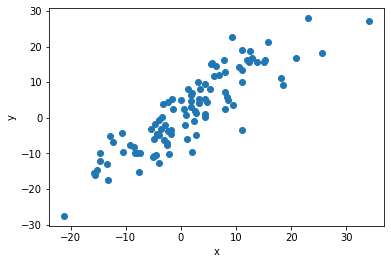

In [ ]:
x = torch.randn(100, 1) * 10
y = x + 5 * torch.randn(100, 1)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')


# Plot the fitted line

Extract model parameter

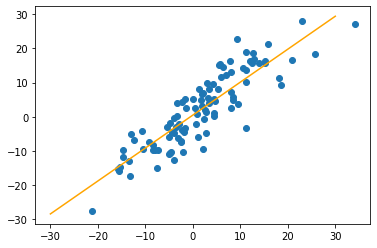

In [ ]:
[w, b] = model.parameters()   # model = LinearRegression(1, 1)

# extract the number of weight and bias.
def get_parameters():
  return w[0][0].item(), b[0].item()

def plot_line():
  w1, b1 = get_parameters()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, color='orange')  
  plt.scatter(x, y)
  plt.show()

plot_line() # the orange line is the random line created with nn.Linear(1, 1)

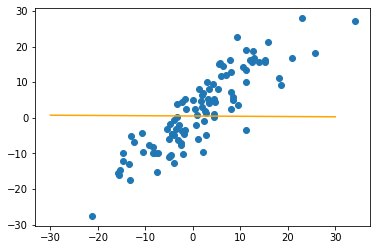

## Training in action

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

epochs = 100
losses = []

for i in range(epochs):
  optimizer.zero_grad()
  output = model(x)
  loss = criterion(output, y)
  
  losses.append(loss)
  
  loss.backward()
  optimizer.step()




Text(0.5, 0, 'epoch')

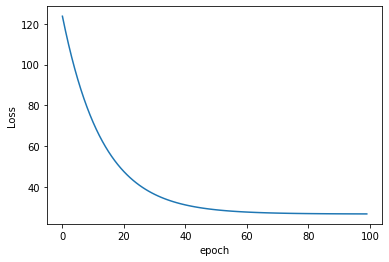

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")


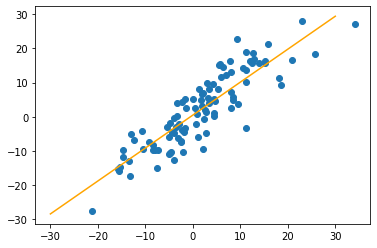

In [ ]:
plot_line()